In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
ticker = 'PAM'

def get_financial_data():
    data_values = []
    today = dt.date.today()
    for short_ema in range(2, 30):
        for long_ema in range(20, 50):
            if short_ema < long_ema:
                data = yf.download(tickers = ticker, start = '2010-1-1', end = f'{today.year}-{today.month}-{today.day}', auto_adjust = True)
                data[f'EMA_{short_ema}'] = data['Close'].ewm(span = short_ema).mean()
                data[f'EMA_{long_ema}'] = data['Close'].ewm(span = long_ema).mean()
                data['Ratio'] = (data[f'EMA_{short_ema}'] / data[f'EMA_{long_ema}']).shift()
                data['State'] = data.apply(lambda row: 'In' if row['Ratio'] >= 1 else 'Out', axis = 1)
                data['Yield'] = data['Close'].pct_change() + 1

                in_asset = data[data['State'] == 'In']
                cumulative_yield = (in_asset['Yield'].prod() - 1)
                start_date = in_asset.index[0].date()
                days = (today - start_date).days
                annual_yield = round((((1 + cumulative_yield) ** (365 / days)) - 1) * 100, 2)
                data_values.append([short_ema, long_ema, annual_yield])

    return data_values

data_values = get_financial_data()
print(data_values)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [3]:
def create_df(data):
    columns = ['short_ema', 'long_ema', 'yield']
    df = pd.DataFrame(data, columns = columns)
    df.sort_values(by = 'yield', ascending = False, inplace = True)
    df = df.iloc[:10, :]
    
    return df

df = create_df(data = data_values)
df

,short_ema,long_ema,yield
215,9,25,11.15
216,9,26,10.98
214,9,24,10.89
244,10,24,10.40
242,10,22,10.30
784,29,49,10.29
243,10,23,10.25
271,11,21,10.20
305,12,25,10.18
241,10,21,9.95


[*********************100%%**********************]  1 of 1 completed


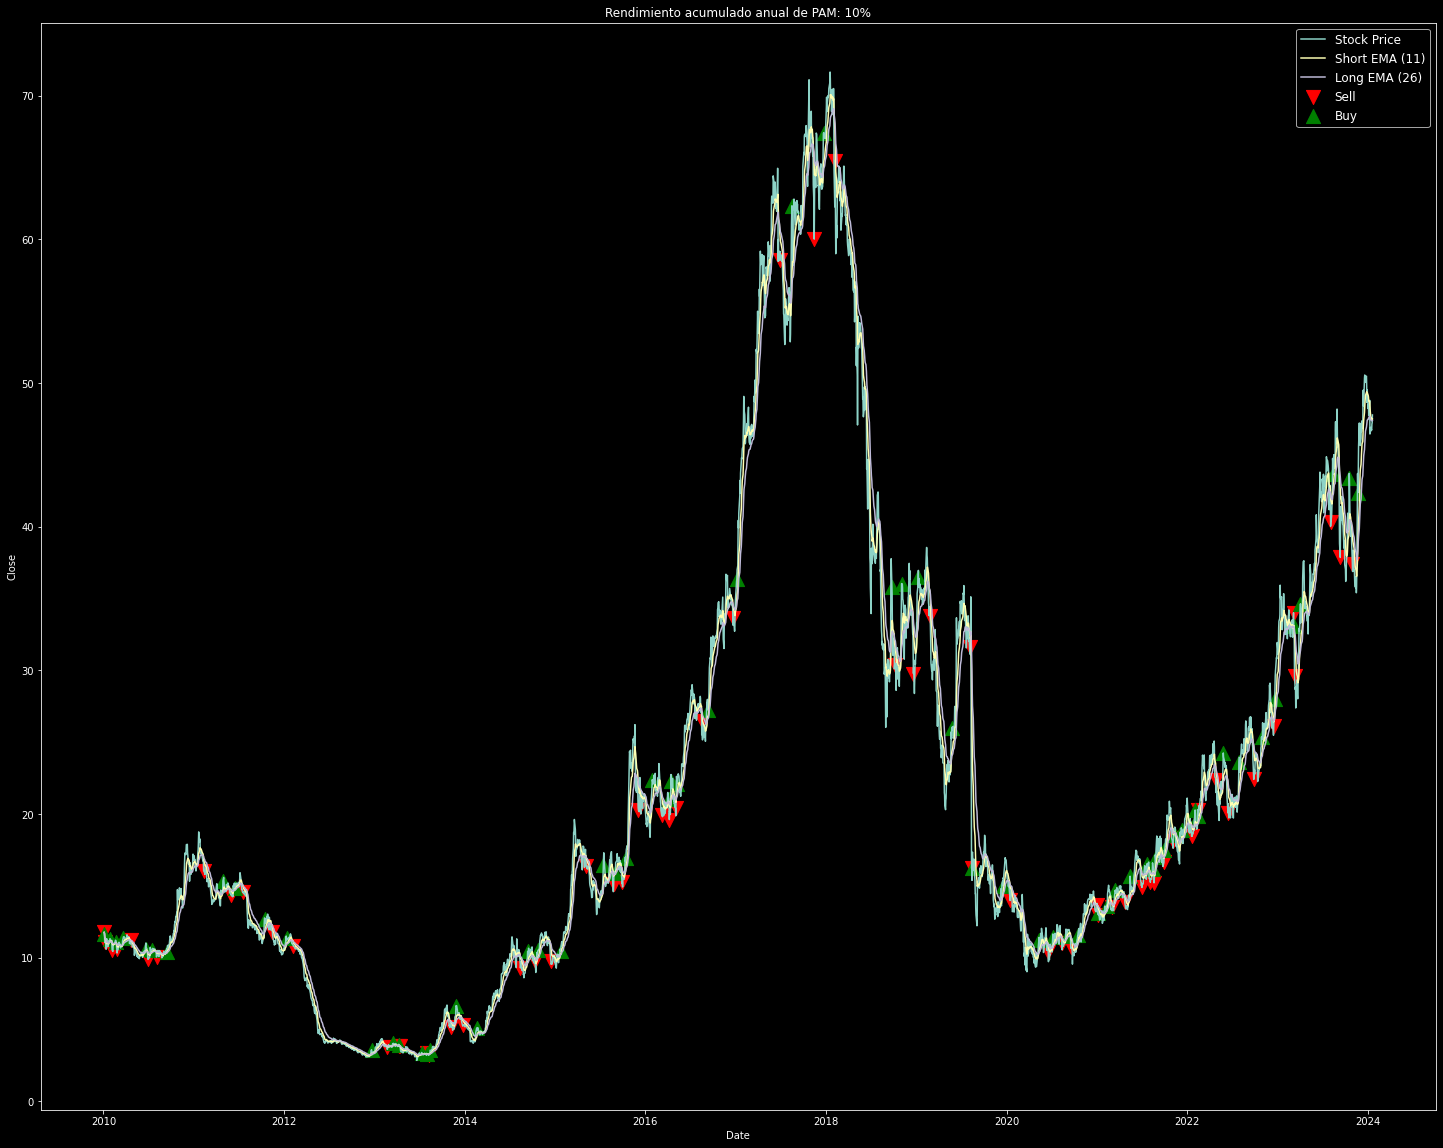

In [4]:
def mean_emas(df):
    today = dt.date.today()
    mean_short_ema = int(df['short_ema'].mean())
    mean_long_ema = int(df['long_ema'].mean())
    mean_yield = int(df['yield'].mean())
    data = yf.download(tickers = ticker, start = '2010-1-1', end = f'{today.year}-{today.month}-{today.day}', auto_adjust = True)
    data[f'EMA_{mean_short_ema}'] = data['Close'].ewm(span = mean_short_ema).mean()
    data[f'EMA_{mean_long_ema}'] = data['Close'].ewm(span = mean_long_ema).mean()
    data['Ratio'] = (data[f'EMA_{mean_short_ema}'] / data[f'EMA_{mean_long_ema}']).shift()
    data['State'] = data.apply(lambda row: 'In' if row['Ratio'] >= 1 else 'Out', axis = 1)
    data['Action'] = ['Buy' if (data['State'][i] == 'In') and (data['State'][i - 1] == 'Out') else 'Sell' if (data['State'][i] == 'Out') and (data['State'][i - 1] == 'In') else 'Pass' for i in range(len(data))]

    sell = data[data['Action'] == 'Sell']
    buy = data[data['Action'] == 'Buy']
    
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize = (25, 20))
    ax.scatter(x = sell.index, y = sell['Close'], color = 'red', marker = 'v', label = 'Sell', s = 200)
    ax.scatter(x = buy.index, y = buy['Close'], color = 'green', marker = '^', label = 'Buy', s = 200)
    stock = sns.lineplot(data = data, x = data.index, y = data['Close'], label = 'Stock Price')
    short_ema = sns.lineplot(data = data, x = data.index, y = data[f'EMA_{mean_short_ema}'], label = f'Short EMA ({mean_short_ema})')
    long_ema = sns.lineplot(data = data, x = data.index, y = data[f'EMA_{mean_long_ema}'], label = f'Long EMA ({mean_long_ema})')
    plt.legend(fontsize = 'large')
    plt.title(f'Rendimiento acumulado anual de {ticker}: {mean_yield}%')
    plt.show()

    return data

df_values = mean_emas(df = df)